In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('cities.csv')
X = data['X'].values
Y = data['Y'].values
names = data['CityName'].values

In [3]:
data

,CityName,X,Y
0,Marchhaus,78.143042,80.513523
1,Molenstal,57.502407,99.360773
2,Mousrijk,21.730118,56.385623
3,Paluire,22.296879,21.777059
4,Houignane,53.933169,34.993577
...,...,...,...
64,Droglone,22.078872,83.932997
65,Winterzijl,47.558426,45.927668
66,Laagechem,36.494690,82.875529
67,Liessee,1.328073,49.835560


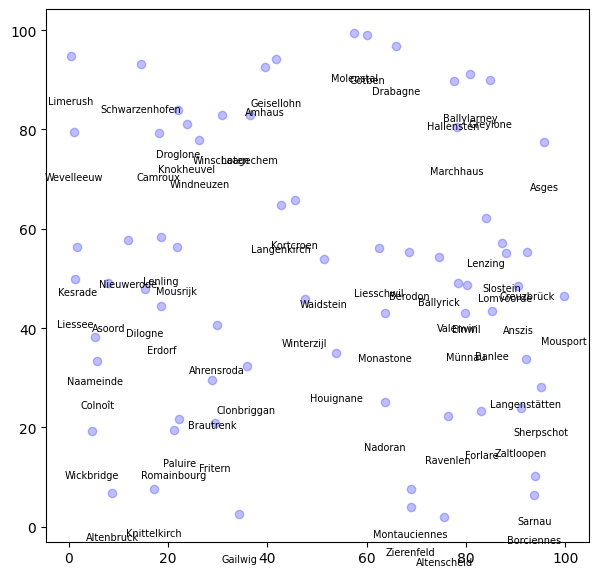

In [4]:
size = 7
plt.figure(figsize=(size, size))
plt.gca().set_aspect('equal')
plt.scatter(X, Y, color='blue', alpha=0.25)
for i, city in enumerate(data['CityName']):
    plt.text(data['X'][i], data['Y'][i] - 10, data['CityName'][i], fontsize=size, ha='center', va='bottom')

<h1>Test route functions</h1>

In [5]:
def show_route(X, Y, cities, route, size=7):
    size = 7
    plt.figure(figsize=(size, size))
    plt.gca().set_aspect('equal')
    plt.scatter(X, Y, color='blue', alpha=0.25)
    for i, city in enumerate(cities):
        plt.text(X[i], Y[i] - 5, city, fontsize=size, ha='center', va='bottom')
        plt.plot([X[route[i]], X[route[i - 1]]], [Y[route[i]], Y[route[i - 1]]], color='black', linewidth=size/10)

    plt.show()

In [6]:
def calculate_distance(X, Y, route):
    s = 0
    for i in range(len(route)):
        s += np.sqrt((X[route[i]] - X[route[i - 1]]) ** 2 + (Y[route[i]] - Y[route[i - 1]]) ** 2)

    return s

<h1>Random route</h1>

3538.4903644847845


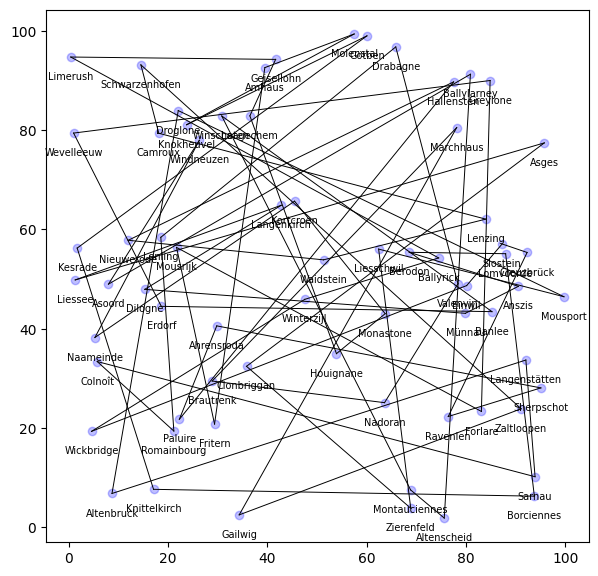

In [7]:
route = np.hstack([0, np.random.permutation(np.arange(1, len(X)))])
print(calculate_distance(X, Y, route))
show_route(X, Y, names, route, 7)

<h1>Reproduce function</h1>

In [8]:
def tsp_crossover(N, genotypes, scores, mutation_rate):
    # Ensure the genotypes and scores have the same length
    assert len(genotypes) == len(scores), "Number of genotypes must match the number of scores"
    
    # Number of genotypes
    population_size = len(genotypes)
    
    # Calculate selection probabilities based on scores
    selection_probs = scores / np.sum(scores)
    
    # Perform crossover to generate new routes
    new_routes = [genotypes[0]]
    for _ in range(N-1):
        # Select two parents based on their probabilities
        parent_indices = np.random.choice(population_size, size=2, p=selection_probs)
        parent1, parent2 = genotypes[parent_indices[0]], genotypes[parent_indices[1]]
        
        # Perform crossover
        crossover_point = np.random.randint(1, len(parent1))  # Choose crossover point
        child = np.hstack((parent1[:crossover_point], [city for city in parent2 if city not in parent1[:crossover_point]])).tolist()
        
        # Perform mutation
        if np.random.rand() < mutation_rate:
            mutation_indices = np.random.choice(len(child), size=2, replace=False)
            child[mutation_indices[0]], child[mutation_indices[1]] = child[mutation_indices[1]], child[mutation_indices[0]]
        
        # Add the child to the new routes
        new_routes.append(child)
    
    return np.array(new_routes)

<h1>Genetic loop</h1>

In [319]:
N = 100
mutation_rate = 1e-3
scores = []
best_distance = float(np.inf)
best_route = None
routes = []
for _ in range(N):
    routes.append(np.hstack([0, np.random.permutation(np.arange(1, len(X)))]))
routes = np.array(routes)
print(routes)

i = 1
while 2137:
    distances = []
    for route in routes:
        distances.append(calculate_distance(X, Y, route))
    
    distances = np.array(distances)
    id = np.argsort(distances)
    distances = np.exp(-distances[id]/1000)
    routes = routes[id]
    routes = tsp_crossover(N, routes, distances, mutation_rate=mutation_rate)
    print(calculate_distance(X, Y, routes[0]))
    scores.append(calculate_distance(X, Y, routes[0]))
    print('Generation: ', i)
    i += 1
    best_route = routes[0]

[[ 0 37 67 ...  1 61 13]
 [ 0 47 40 ... 30 45  2]
 [ 0  3 48 ... 43 40 49]
 ...
 [ 0  6 35 ... 22 68  8]
 [ 0 30  8 ... 12 56 34]
 [ 0 35 15 ... 16 59 53]]
3213.404440972239
Generation:  1
3213.404440972239
Generation:  2
3213.404440972239
Generation:  3
3213.404440972239
Generation:  4
3213.404440972239
Generation:  5
3213.404440972239
Generation:  6
3137.957577444479
Generation:  7
3022.9765139791125
Generation:  8
3010.9290621923233
Generation:  9
3010.9290621923233
Generation:  10
3010.9290621923233
Generation:  11
3010.9290621923233
Generation:  12
2931.2615751616845
Generation:  13
2931.2615751616845
Generation:  14
2931.2615751616845
Generation:  15
2931.2615751616845
Generation:  16
2931.2615751616845
Generation:  17
2931.2615751616845
Generation:  18
2931.2615751616845
Generation:  19
2931.2615751616845
Generation:  20
2931.2615751616845
Generation:  21
2931.2615751616845
Generation:  22
2931.2615751616845
Generation:  23
2931.2615751616845
Generation:  24
2804.053531561092
Ge

KeyboardInterrupt: 

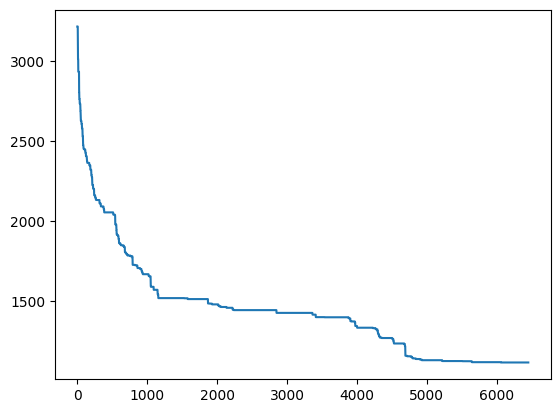

In [320]:
plt.plot(scores)
plt.show()

1119.4732832013344


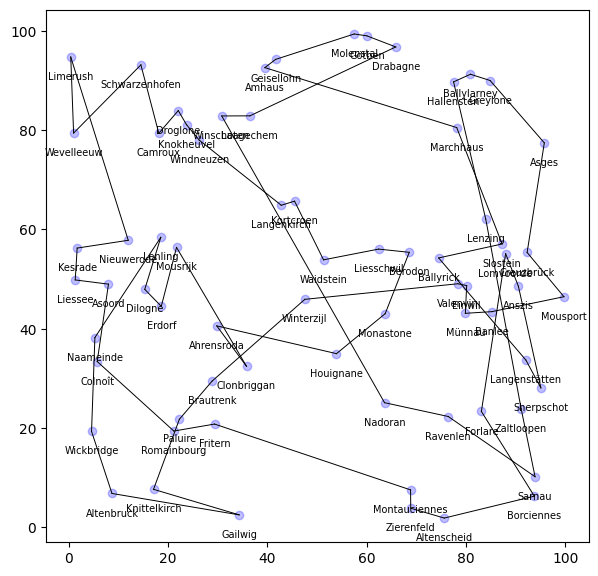

In [321]:
print(calculate_distance(X, Y, best_route))
show_route(X, Y, names, best_route, 7)